In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

ds         y
0  2007-12-10  9.590761
1  2007-12-11  8.519590
2  2007-12-12  8.183677
3  2007-12-13  8.072467
4  2007-12-14  7.893572

In [3]:
m = Prophet()
m.fit(df)

13:07:08 - cmdstanpy - INFO - Chain [1] start processing
13:07:08 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
3265 2017-01-15
3266 2017-01-16
3267 2017-01-17
3268 2017-01-18
3269 2017-01-19

In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
3265 2017-01-15  8.200123    7.502395    8.953696
3266 2017-01-16  8.525119    7.785897    9.270332
3267 2017-01-17  8.312512    7.609779    9.009614
3268 2017-01-18  8.145089    7.455147    8.859617
3269 2017-01-19  8.156982    7.385408    8.925596

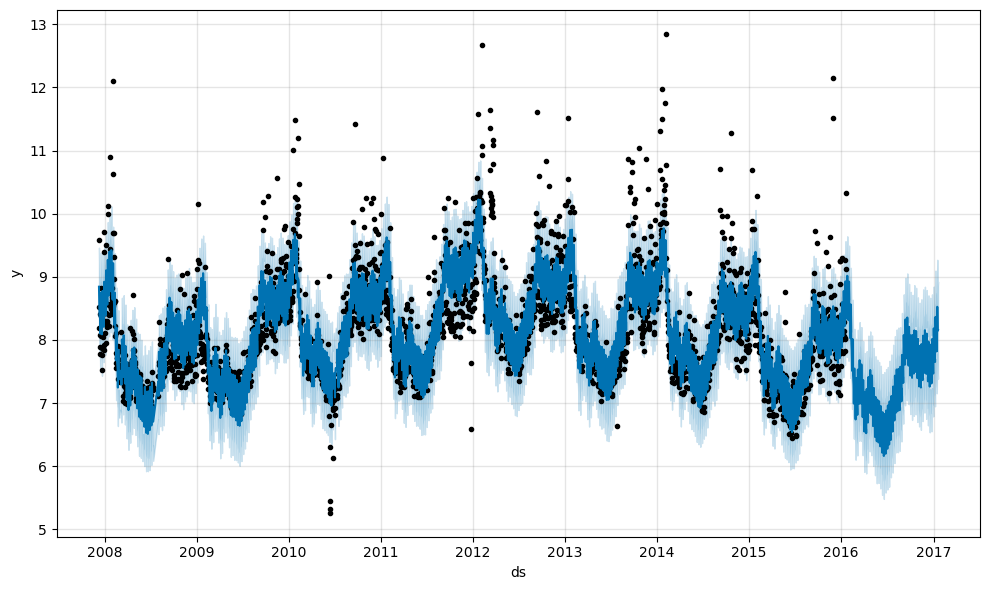

In [6]:
fig1 = m.plot(forecast)

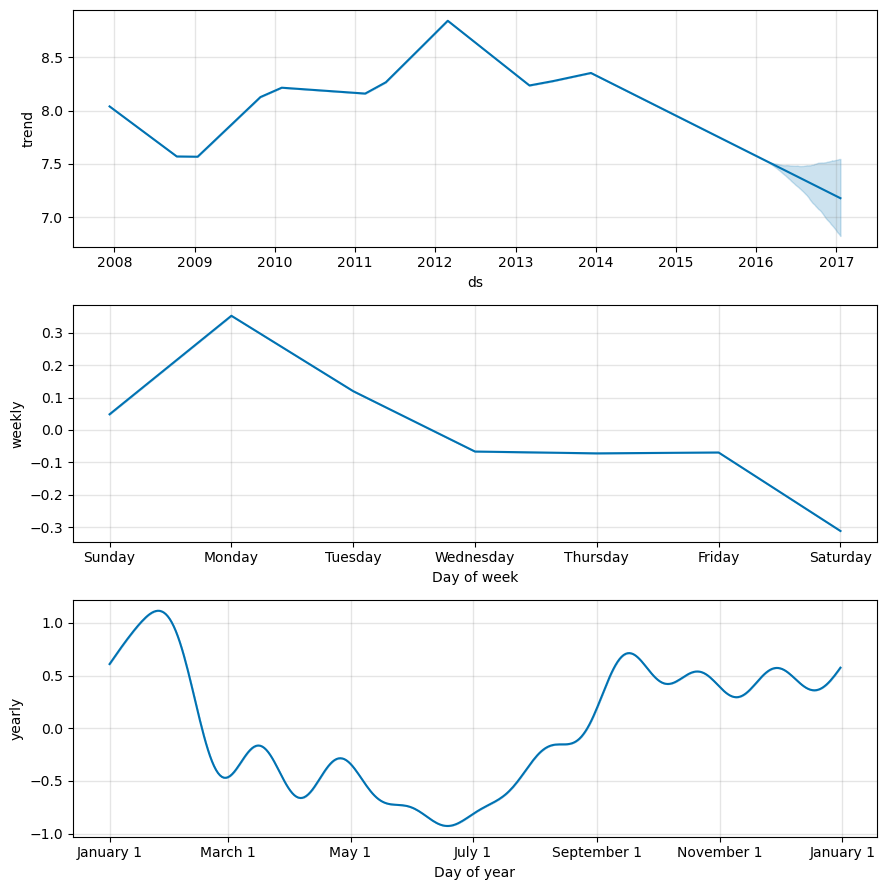

In [7]:
fig2 = m.plot_components(forecast)

In [8]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [9]:
plot_components_plotly(m, forecast)

Saturating Forecasts

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R.csv')

In [13]:
df['cap'] = 8.5
df.head()

ds         y  cap
0  2008-01-30  5.976351  8.5
1  2008-01-16  6.049733  8.5
2  2008-01-17  6.011267  8.5
3  2008-01-14  5.953243  8.5
4  2008-01-15  5.910797  8.5

In [14]:
m = Prophet(growth='logistic')
m.fit(df)

13:23:56 - cmdstanpy - INFO - Chain [1] start processing
13:23:56 - cmdstanpy - INFO - Chain [1] done processing


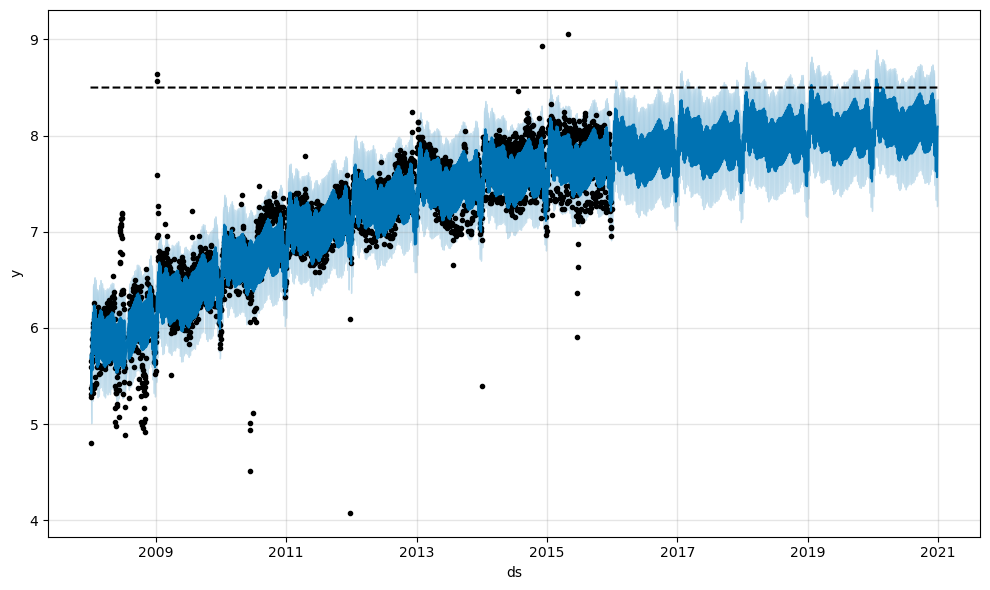

In [15]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)

13:26:28 - cmdstanpy - INFO - Chain [1] start processing
13:26:28 - cmdstanpy - INFO - Chain [1] done processing


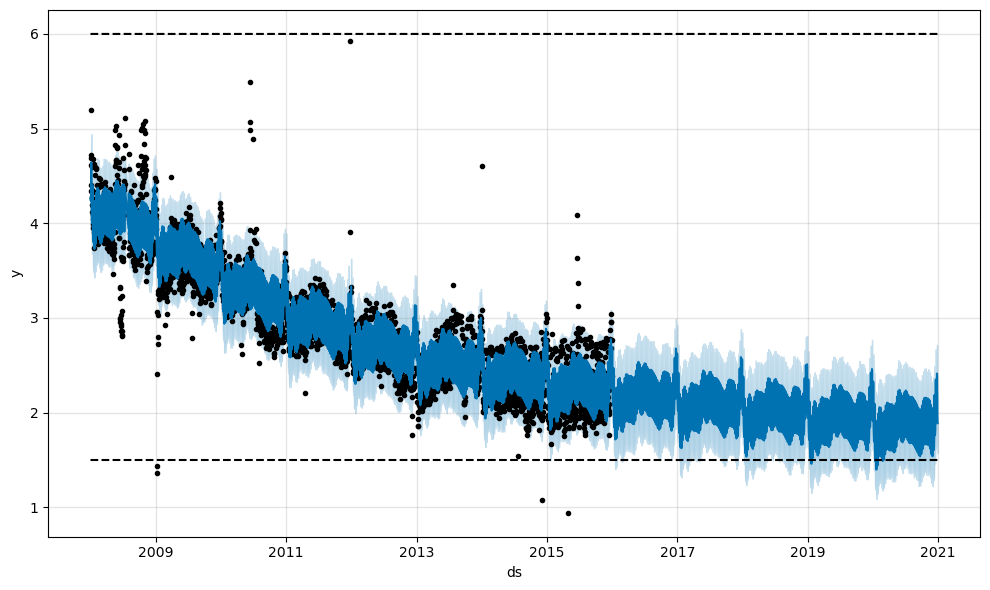

In [16]:
df['y'] = 10 - df['y']
df['cap'] = 6
df['floor'] = 1.5
future['cap'] = 6
future['floor'] = 1.5
m = Prophet(growth='logistic')
m.fit(df)
fcst = m.predict(future)
fig = m.plot(fcst)

Automatic changepoint detection in Prophet

14:52:42 - cmdstanpy - INFO - Chain [1] start processing
14:52:42 - cmdstanpy - INFO - Chain [1] done processing


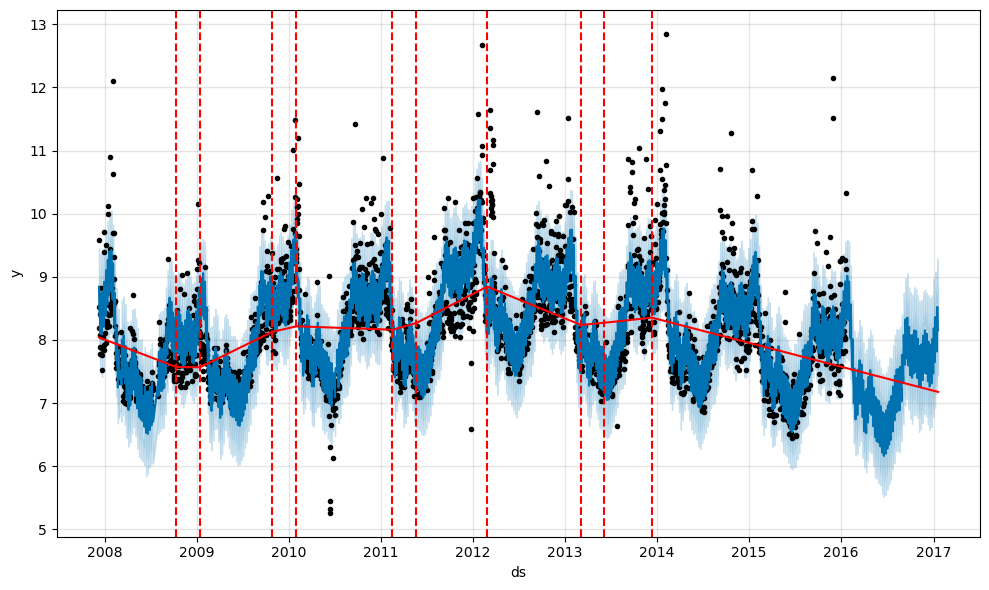

In [18]:
from prophet.plot import add_changepoints_to_plot
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

10:44:16 - cmdstanpy - INFO - Chain [1] start processing
10:44:17 - cmdstanpy - INFO - Chain [1] done processing


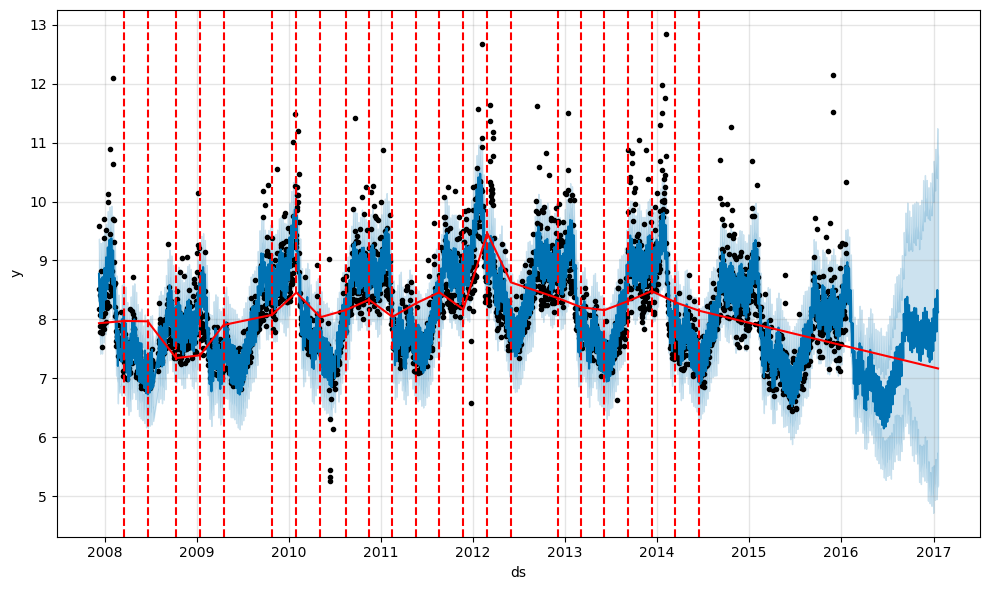

In [21]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

10:46:08 - cmdstanpy - INFO - Chain [1] start processing
10:46:09 - cmdstanpy - INFO - Chain [1] done processing


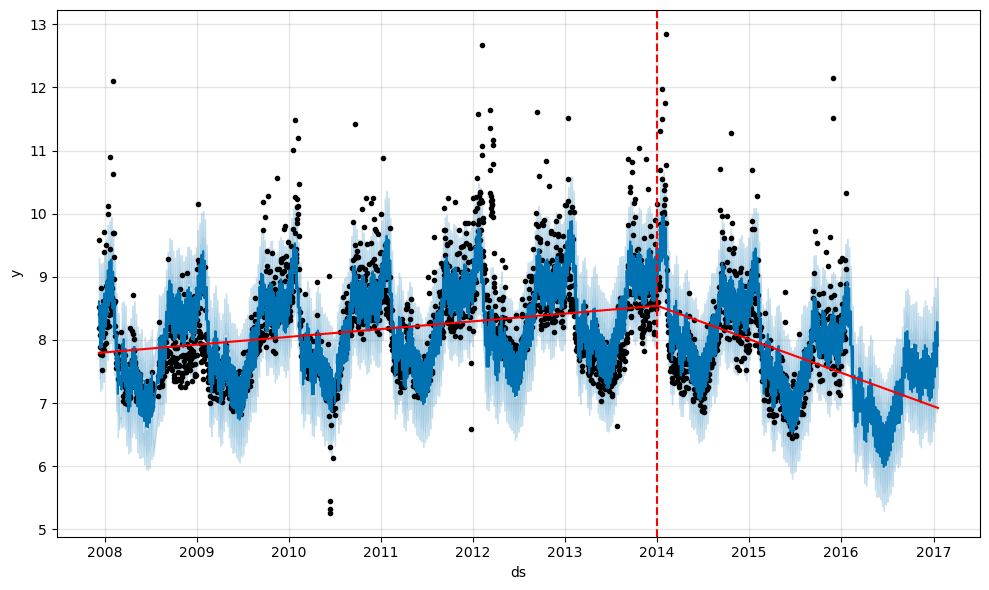

In [22]:
m = Prophet(changepoints=['2014-01-01'])
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [23]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [24]:
m = Prophet(holidays=holidays)
forecast = m.fit(df).predict(future)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

10:56:48 - cmdstanpy - INFO - Chain [1] start processing
10:56:48 - cmdstanpy - INFO - Chain [1] done processing


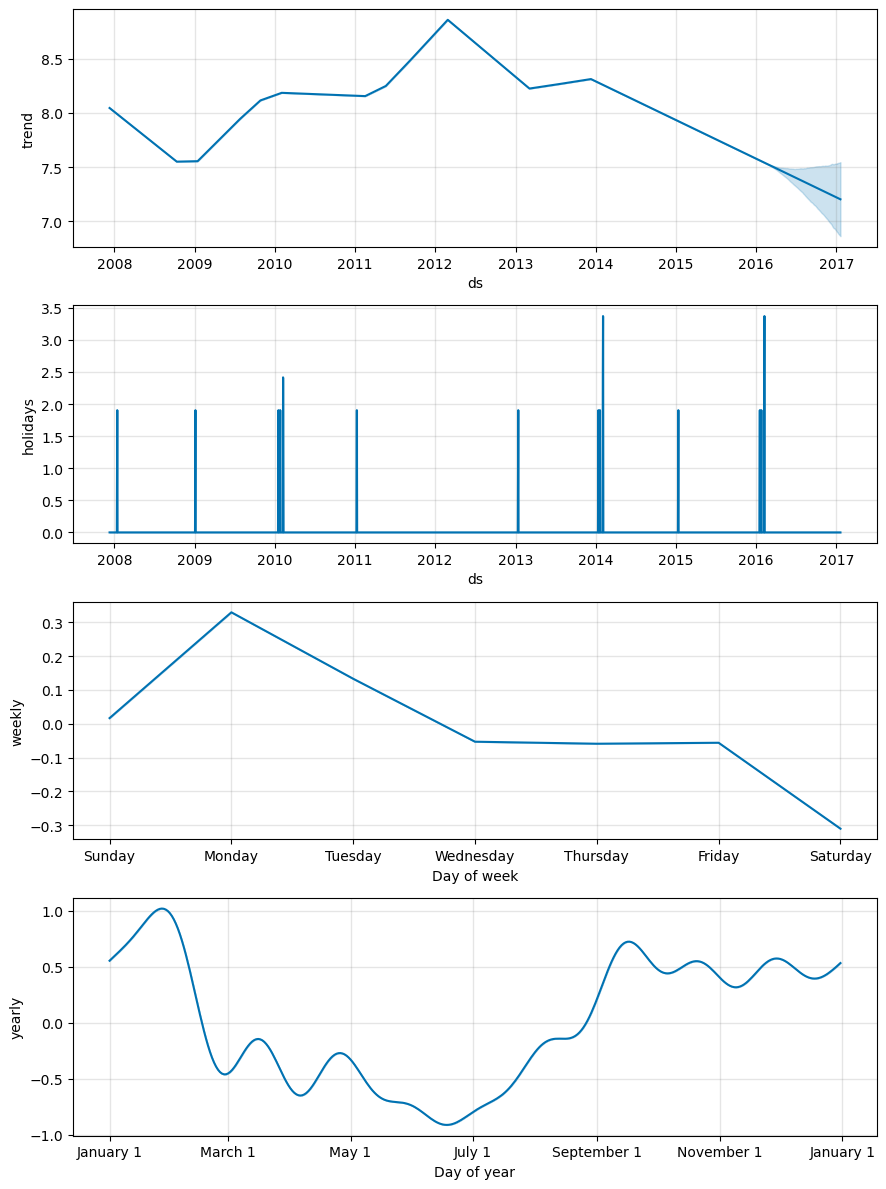

In [25]:
fig = m.plot_components(forecast)

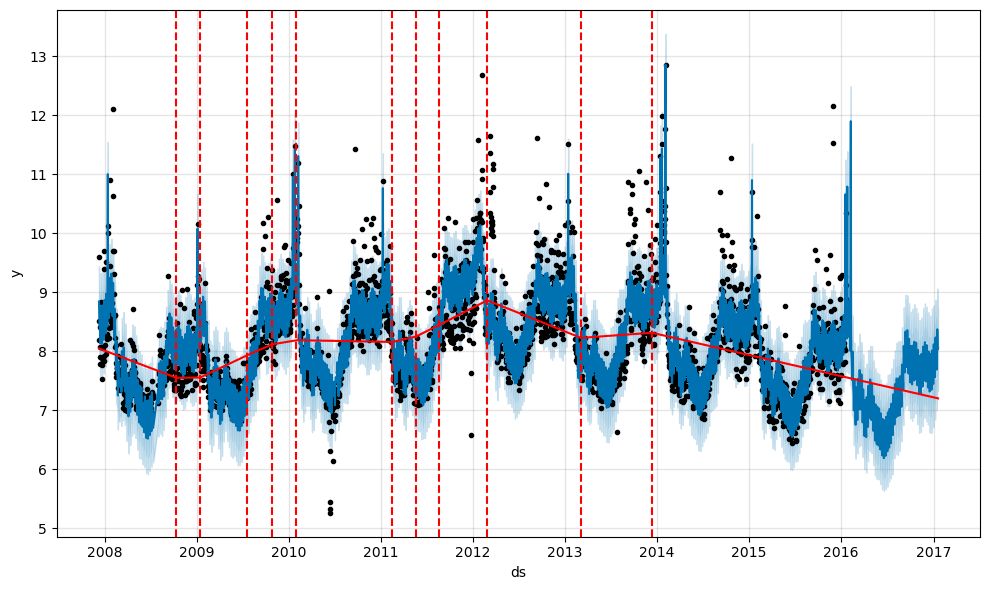

In [26]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [27]:
m = Prophet(holidays=holidays)
m.add_country_holidays(country_name='US')
m.fit(df)

10:59:40 - cmdstanpy - INFO - Chain [1] start processing
10:59:41 - cmdstanpy - INFO - Chain [1] done processing


In [28]:
m.train_holiday_names

0                         playoff
1                       superbowl
2                  New Year's Day
3      Martin Luther King Jr. Day
4           Washington's Birthday
5                    Memorial Day
6                Independence Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10                   Thanksgiving
11                  Christmas Day
12       Christmas Day (Observed)
13        Veterans Day (Observed)
14    Independence Day (Observed)
15      New Year's Day (Observed)
dtype: object

14:10:47 - cmdstanpy - INFO - Chain [1] start processing
14:10:48 - cmdstanpy - INFO - Chain [1] done processing


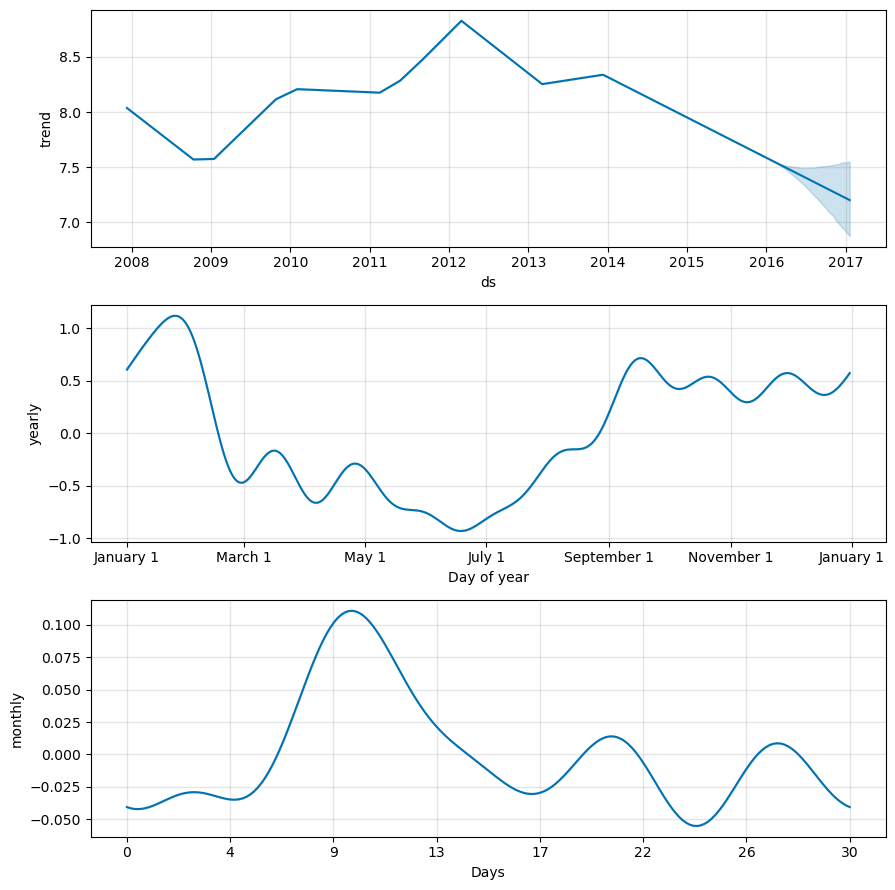

In [29]:
m = Prophet(weekly_seasonality=False)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = m.fit(df).predict(future)
fig = m.plot_components(forecast)